In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [3]:
plt.isinteractive()

True

In [2]:
tips = sb.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


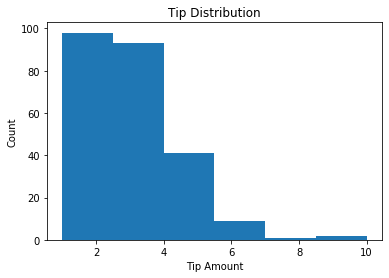

In [7]:
plt.title("Tip Distribution")
plt.xlabel("Tip Amount")
plt.ylabel("Count")
d = plt.hist(tips['tip'], bins=6)

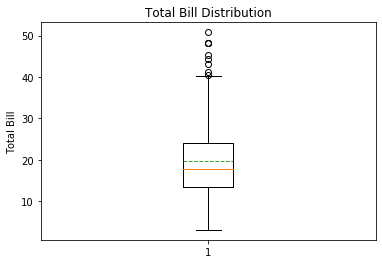

In [12]:
plt.title("Total Bill Distribution")
plt.ylabel("Total Bill")
data = plt.boxplot(tips['total_bill'], showmeans=True, meanline=True)

In [21]:
day_total = tips.groupby("day", as_index=False)['total_bill'].sum()

In [22]:
day_total

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


<BarContainer object of 4 artists>

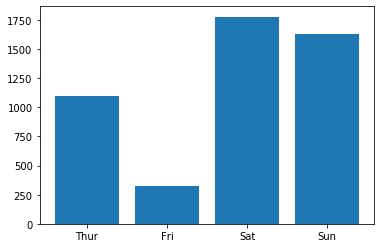

In [23]:
plt.bar(x='day',height='total_bill', data=day_total)

<BarContainer object of 4 artists>

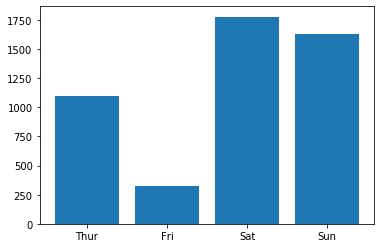

In [26]:
plt.bar(x=day_total['day'],height=day_total['total_bill'])

(0, 5)

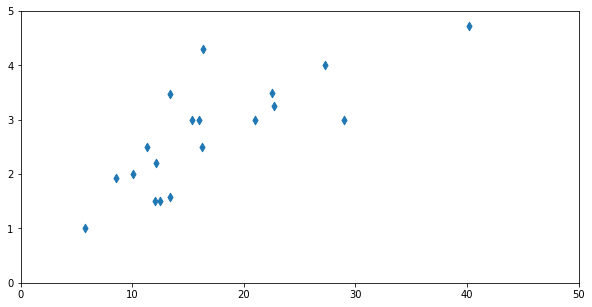

In [30]:
plt.scatter('total_bill','tip', marker='d', data=tips.loc[tips['day'] == 'Fri'])
plt.gcf().set_size_inches(10,5)
plt.xlim(0,50)
plt.ylim(0,5)
#plt.savefig("tips_total.jpg")

In [11]:
img = plt.imread('tips_total.jpg')

In [12]:
type(img)

numpy.ndarray

In [59]:
img.shape

(360, 720, 3)

## Object API

In [17]:
total_tip = tips.groupby("day")['tip'].sum()
total_bill = tips.groupby("day")["total_bill"].sum()

In [14]:
total_tip

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [15]:
total_tip.index

CategoricalIndex(['Thur', 'Fri', 'Sat', 'Sun'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, name='day', dtype='category')

In [16]:
total_tip.values

array([171.83,  51.96, 260.4 , 247.39])

Text(0, 0.5, 'Total Amount')

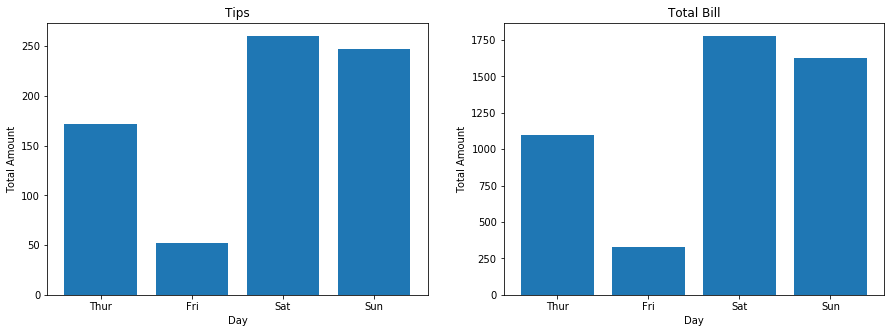

In [27]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
ax[0].bar(x = total_tip.index, height = total_tip.values)
ax[0].set_title("Tips")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Total Amount")

ax[1].bar(x = total_bill.index, height = total_bill.values)
ax[1].set_title("Total Bill")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Total Amount")

In [35]:
total = pd.pivot_table(data = tips, index="day",columns='sex',values='total_bill',aggfunc='sum')
total

sex,Male,Female
day,,
Thur,561.44,534.89
Fri,198.57,127.31
Sat,1227.35,551.05
Sun,1269.46,357.70


In [31]:
total.index

CategoricalIndex(['Thur', 'Fri', 'Sat', 'Sun'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, name='day', dtype='category')

In [33]:
total['Male']

day
Thur     561.44
Fri      198.57
Sat     1227.35
Sun     1269.46
Name: Male, dtype: float64

In [34]:
total['Female']

day
Thur    534.89
Fri     127.31
Sat     551.05
Sun     357.70
Name: Female, dtype: float64

<BarContainer object of 4 artists>

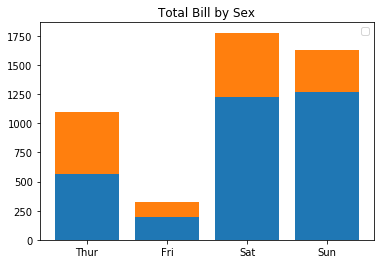

In [52]:
plt.legend(total.columns)
plt.title("Total Bill by Sex")
plt.bar(x=total.index, height=total['Male'])
plt.bar(x=total.index, height=total['Female'], bottom= total['Male'])

In [43]:
day_total = tips.groupby("day")['total_bill'].sum()

In [44]:
day_total

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

matplotlib.patches.Wedge

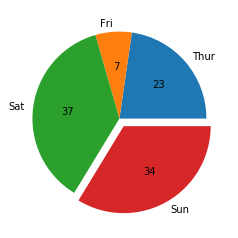

In [59]:
ax = plt.pie( day_total.values, labels = day_total.index, autopct="%2.0f", explode=(0,0,0,0.1))
type(ax[0][0])